## Numerical Error

### Example 1

In [1]:
# example to illustrate machine error using large error constant C
# to make it easier to see graphically
import numpy as np
import matplotlib.pyplot as plt

# define array size
N = int(1e6)
# define number of bins for histogram
N_Bins = 100
# define C, which is our simulated error constant
C = 1e-2

In [2]:
# define numbers
(x1, x2) = (3, -3.2)
# define error standard deviations in terms of C
sigma1 = C*abs(x1)
sigma2 = C*abs(x2)
# define distributions to those numbers satisfying sigma = Cx
# This is how we simulate error.
d1 = np.random.normal(loc=x1, scale=sigma1, size=N)
d2 = np.random.normal(loc=x2, scale=sigma2, size=N)

# then add up the distributions
sumd = d1 + d2

Text(0.5, 0, 'mean +- absolute error:3 +- 0.03')

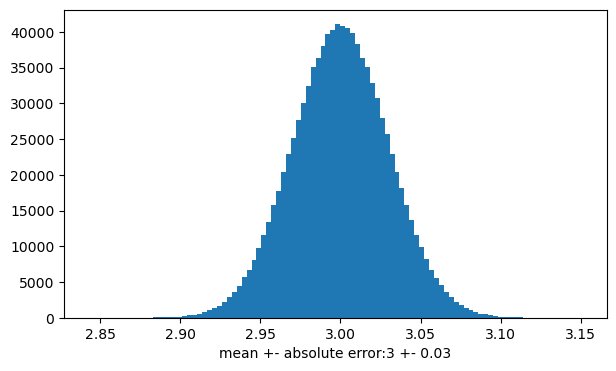

In [3]:
# this plot just shows a single number and its error
plt.figure(2, figsize=((7, 4)))
plt.hist(d1, N_Bins, histtype='stepfilled')
plt.xlabel('mean +- absolute error:' + str(x1) + r' +- ' + str(sigma1))


Text(0.5, 0, 'mean + absolute error')

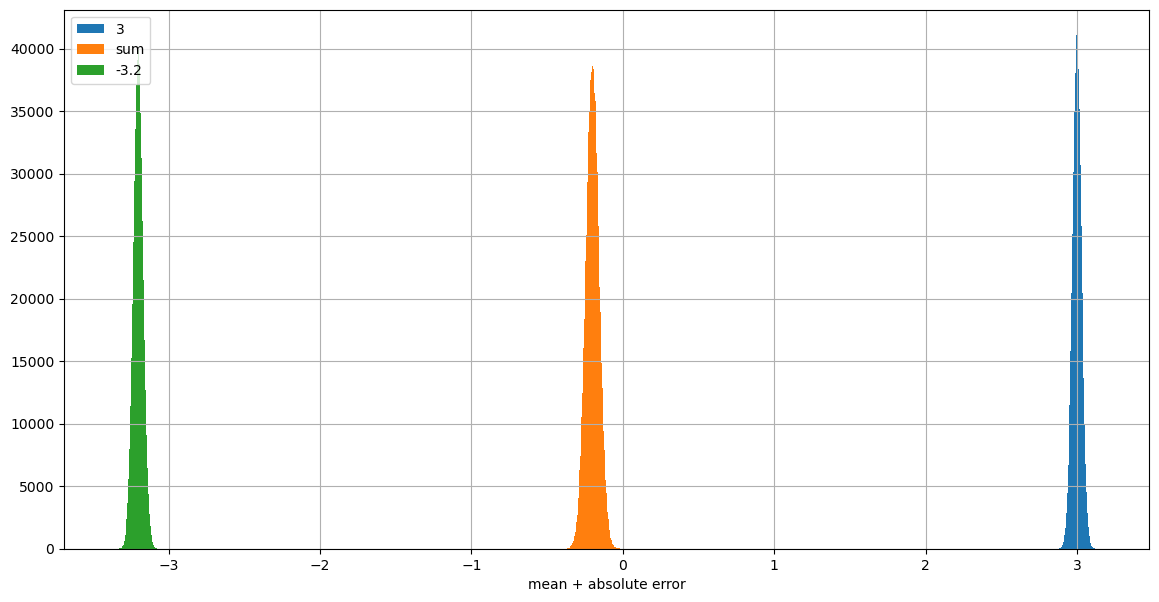

In [4]:
plt.figure(1, figsize=((14, 7)))
# plot histograms of the two numbers and their sum
plt.hist(d1, N_Bins, histtype='stepfilled')
plt.hist(sumd, N_Bins, histtype='stepfilled')
plt.hist(d2, N_Bins, histtype='stepfilled')
plt.legend((str(x1), 'sum', str(x2)), loc='upper left')
plt.grid()
plt.xlabel('mean + absolute error')

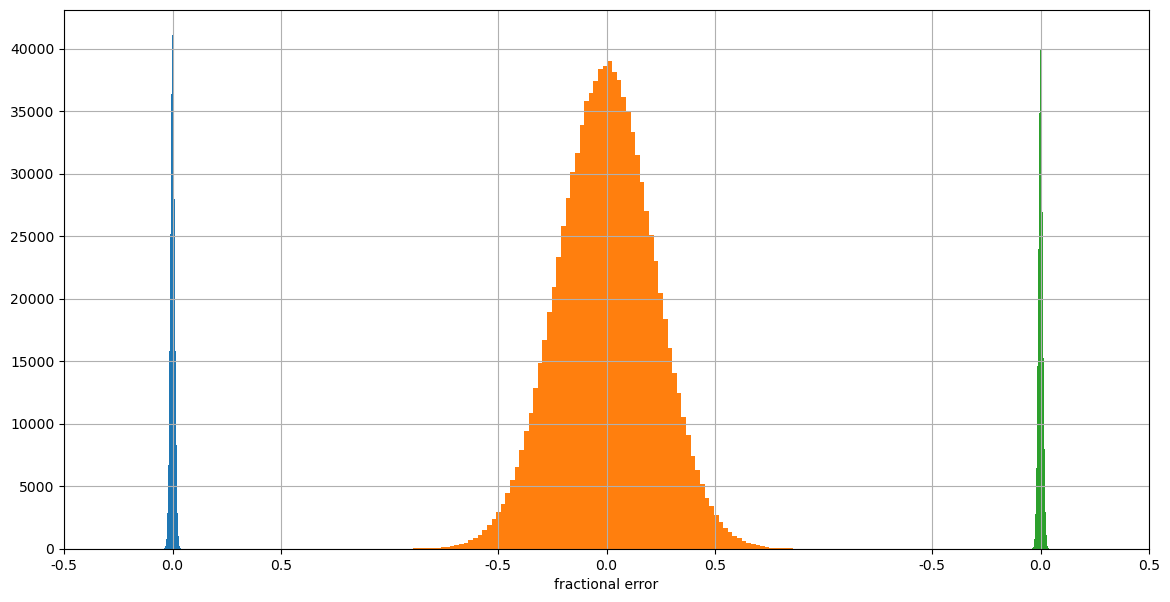

In [5]:
# then plot fractional error by dividing by the mean values.
# fractional errors will be large for opposite-signed large numbers
# offset and spread have to be adjusted to make the plots clear.
plt.figure(figsize=(14, 7))
offset = 2
spread = offset/4.0

plt.hist(-offset+(d1-x1)/x1, N_Bins, histtype='stepfilled')
plt.hist((sumd-(x1+x2))/(x1+x2), N_Bins, histtype='stepfilled')
plt.hist(offset+(d2-x2)/x2, N_Bins, histtype='stepfilled')

plt.xticks([-offset-spread, -offset, -offset+spread, -spread, 0,
            spread, offset-spread, offset, offset+spread],
           [str(-spread), str(0.0), str(spread), str(-spread),
            str(0.0), str(spread), str(-spread), str(0.0), str(spread)])

plt.grid()
plt.xlabel('fractional error')
plt.show()


### Example 2

Test the **relative error** when you estimate standard deviation using each of the following two methods:

1. $\overline x \equiv \frac 1 n\sum_{i=1}^{n}x_i , \sigma\equiv\sqrt{\frac{1}{n-1}\sum_{i=1}^n\left(x_i-\overline
      x\right)^2}$
2. $\sigma\equiv \sqrt{\frac{1}{n-1}\left(\sum_{i=1}^nx_i^2-n{\overline x}^2\right)}$

treating the method numpy.std as giving the "true" answer. The input for this calculation will be a supplied dataset (Michelsen's speed-of-light measurements, taken from http://math.ucr.edu/home/baez/physics/Relativity/SpeedOfLight/measure_c.html) consisting of a  one-dimensional array of values that is read in using numpy.loadtxt.

Note, the two methods are mathematically equivalent. The first method requires two passes through the data: the first to calculate the mean and the second to compute the standard deviation (by subtracting the mean in the term $(x_i-\overline x)$ before squaring it). The second method might seem preferable because you can calculate $\sigma$ with only a single pass through the data, so you can (for example) calculate these statistics on a live incoming data stream as it updates.

In [ ]:
#pseudo code
# DEFINE relative error function: (x - truth)/truth
# DEFINE one-pass method for sd: calculate (x-mean(x)), square it, sum it, divide by (N-1), sqrt it
# DEFINE two-pass method for sd deviation: calculate sum of x^2, subtract the square of x summed, divide by (N-1), sqrt it
# CALL numpy.loadtxt to LOAD text data of N values
# CALL one-pass method with data
# CALL two-pass method with data
# CALL numpy.std method with data to CALCULATE truth
# CALL relative error function to CALCULATE error for one-pass result relative to truth
# CALL relative error function to CALCULATE error for two-pass result relative to truth
# PRINT relative errors

In [2]:
#actual code
import numpy as np
# define the relative error function
def relative_error(x,y):
    """Relative error as abs((x-y)/y)"""
    return abs((x-y)/y)
# define the two methods for calculating standard deviation
def std2(x):
    """two pass"""
    return np.sqrt(np.sum(np.square(x-np.mean(x)))/(x.size-1))
def std1(x):
    """one pass"""
    var = (np.sum(np.square(x))-x.size*np.square(np.mean(x)))/(x.size-1)
    if var < 0:
        print("Negative variance")
    return np.sqrt(np.abs(var))
def npstd(x):
    """Numpy standard deviation, 1 degree of freedom"""
    return np.std(x,ddof=1)

# load the text data
data = np.loadtxt("cdata.txt")
# calculate the standard deviation from three methods
result = dict(np=npstd, one=std1, two=std2)
# calculate the relative error and print the results
error = dict()
actual = np.std(data, ddof=1)
for k,v in result.items():
    result[k] = v(data)
    error[k] = relative_error(result[k],actual)
    print(k,result[k])

np 0.07901054781905067
one 0.07901054763832621
two 0.07901054781905067


In [3]:
print('The one-pass method gives sigma = ', result["one"])
print('The two-pass method gives sigma = ', result["two"])
print('              numpy gives sigma = ', result["np"])
print(' ')
print('The one-pass method gives has relative error = ', error["one"])
print('The two-pass method gives has relative error = ', error["two"])

The one-pass method gives sigma =  0.07901054763832621
The two-pass method gives sigma =  0.07901054781905067
              numpy gives sigma =  0.07901054781905067
 
The one-pass method gives has relative error =  2.2873460336752e-09
The two-pass method gives has relative error =  0.0


**Analysis**: The one pass method has much larger error (by 7 orders of magnitude or more). Both are reasonably good.

### Workaround for one-pass method
To reduce the error in the one-pass method, try subtracting the mean from each of the x values first. The mean shouldn't impact the variance.

Actually, it's expensive to calculate the mean, so removing the first element's value might work too.

In [5]:
#1c normal distribution

#set up parameters
data_dict = dict(a=(0.,1.,2000), b=(1.e7,1.,2000))
for i,kk in enumerate(data_dict.keys()):
    vv = data_dict[kk]
    result = dict(np=npstd, one=std1, two=std2)
    data = np.random.normal(*vv)
    data = data - data[0]
    actual = np.std(data,ddof=1)
    error = dict()
    for k,v in result.items():
        result[k] = v(data)
        error[k] = relative_error(result[k],actual)
        
    print("FOR normal distribution {}".format(i))
    print('  The one-pass method gives sigma = ', result['one'])
    print('  The two-pass method gives sigma = ', result['one'])
    print('                numpy gives sigma = ',  result['np'])
    print('   ')
    print('  The one-pass method gives a relative error = ', error["one"])
    print('  The two-pass method gives a relative error = ', error["two"])
    print('')
    print('============')

#same precision!

FOR normal distribution 0
  The one-pass method gives sigma =  0.9754747992601047
  The two-pass method gives sigma =  0.9754747992601047
                numpy gives sigma =  0.9754747992601046
   
  The one-pass method gives a relative error =  1.1381360394622783e-16
  The two-pass method gives a relative error =  0.0

FOR normal distribution 1
  The one-pass method gives sigma =  1.029589909931837
  The two-pass method gives sigma =  1.029589909931837
                numpy gives sigma =  1.029589909931837
   
  The one-pass method gives a relative error =  0.0
  The two-pass method gives a relative error =  0.0



## Example 3

Now we will evaluate the standard deviation of a sequence with a predetermined sample variance.

Generate two normally distributed sequences:
1.  (mean, sigma, n) =  (0.0, 1.0, 2000)
2.  (mean, sigma, n) = (1.0e7, 1.0, 2000) 

Note the second sequence has the same standard deviation, but a larger mean, than the first.

Calculate the standard deviation of each sequence, using each of the two methods in Example 2.
Then evaluate the relative error of each standard deviation calculation, again using numpy.std to find the "true" value. How does the relative error behave for the two sequences?

In [4]:
data_dict = dict(a=(0.,1.,2000), b=(1.e7,1.,2000))
for i,kk in enumerate(data_dict.keys()):
    vv = data_dict[kk]
    result = dict(np=npstd, one=std1, two=std2)
    data = np.random.normal(*vv)
    actual = np.std(data,ddof=1)
    error = dict()
    for k,v in result.items():
        result[k] = v(data)
        error[k] = relative_error(result[k],actual)
        
    print("FOR normal distribution {}".format(i))
    print('  The one-pass method gives sigma = ', result['one'])
    print('  The two-pass method gives sigma = ', result['one'])
    print('                numpy gives sigma = ',  result['np'])
    print('   ')
    print('  The one-pass method gives a relative error = ', error["one"])
    print('  The two-pass method gives a relative error = ', error["two"])
    print('')
    print('============')
    

FOR normal distribution 0
  The one-pass method gives sigma =  1.0356106166264618
  The two-pass method gives sigma =  1.0356106166264618
                numpy gives sigma =  1.035610616626462
   
  The one-pass method gives a relative error =  2.1440935556295223e-16
  The two-pass method gives a relative error =  0.0

FOR normal distribution 1
  The one-pass method gives sigma =  1.0042431240123395
  The two-pass method gives sigma =  1.0042431240123395
                numpy gives sigma =  1.0060753818186174
   
  The one-pass method gives a relative error =  0.0018211933612428555
  The two-pass method gives a relative error =  0.0



**Analysis** : In the first case, the smaller relative mean compared to the standard deviation reduces the relative errors to the machine precision. In the second case the one pass method has a much larger error.